# Results_CaseStudy

In [1]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score


%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def plot(file_path):
    data = pd.read_csv(file_path)
    
    plt.figure(figsize = (6,6))
    sns.scatterplot(data = data , 
                    x = "x" , 
                    y = "y" , 
                    hue = "group",
                    # hue_order = ['A' , 'B' , 'C'],
                    palette = 'muted')
    plt.title("Spatial Distributions of Groups")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title = "Group")
    plt.show()

In [3]:
def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight)
    
    return {
        "ARI":ARI , 
        "NMI":NMI ,
        "Silhouette Coefficient":Silhouette,
        "FMI":FMI,
        "SGD":SGD
    }

## Case 1 : 边缘/中心

### 边缘

In [29]:
coordinate_file_truth = "data/simulate/Case1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1/edge_SpatialData.csv"

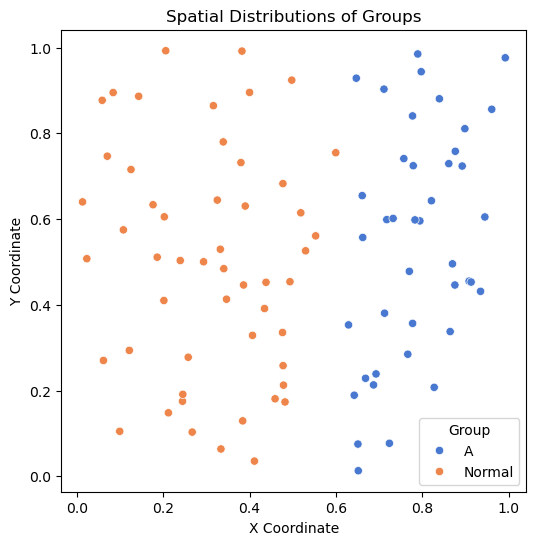

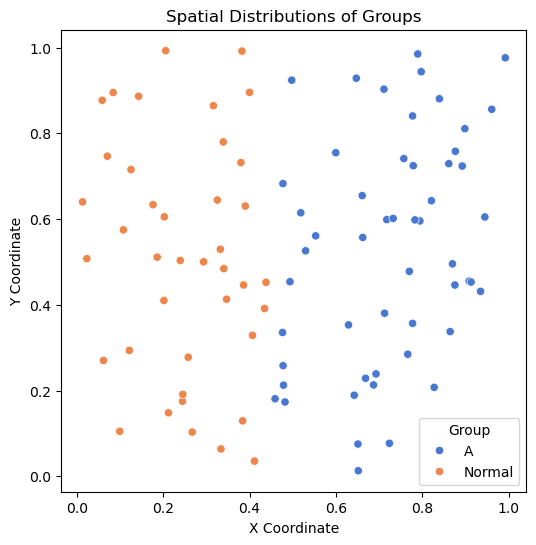

In [25]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [30]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.01 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.34753340616847317,
 'FMI': 0.7741665777804776,
 'SGD': 0.4197435451741509}

### 中心

In [31]:
coordinate_file_truth = "data/simulate/Case1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1/center_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred ,apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.00 seconds.
Getting edge attributes took 0.02 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.17981067635626208,
 'FMI': 0.7741665777804776,
 'SGD': 0.6823849642432183}

## Case 2 : FN vs FP

### Case2.1:Binary

#### FP

In [36]:
coordinate_file_truth = "data/simulate/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.1/N-A_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.02 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.2398340695391199,
 'FMI': 0.7741665777804776,
 'SGD': 0.3699288805192571}

#### FN

In [44]:
coordinate_file_truth = "data/simulate/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.1/A-N_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 0.00 seconds.


{'ARI': 0.5453852108087306,
 'NMI': 0.5418868089053984,
 'Silhouette Coefficient': 0.3449033229208199,
 'FMI': 0.7886562677642973,
 'SGD': 0.4346377589001147}

### Case2.2: 3 types 
Anomaly: B C 

Normal:A

type B is more serious than type C

#### B-A

In [52]:
coordinate_file_truth = "data/simulate/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.2/BA_SpatialData.csv"

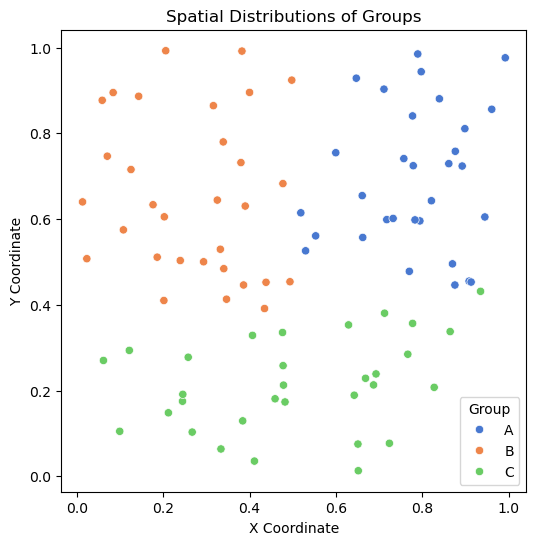

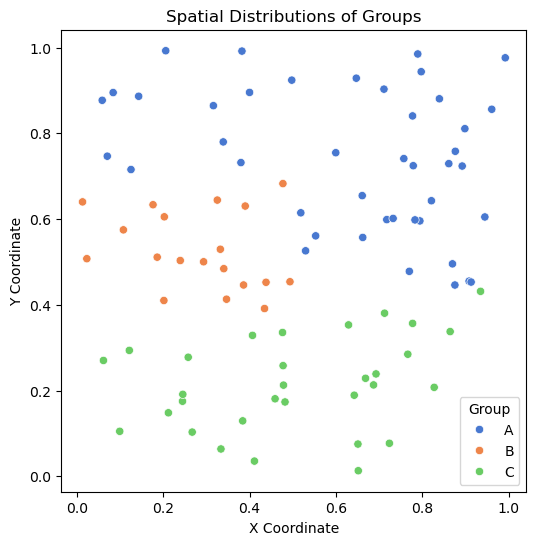

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [57]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.00 seconds.
Getting edge attributes took 0.02 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923224,
 'Silhouette Coefficient': 0.2376376035724321,
 'FMI': 0.79646086722093,
 'SGD': 0.2857667694887407}

#### C-A

In [58]:
coordinate_file_truth = "data/simulate/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.2/CA_SpatialData.csv"

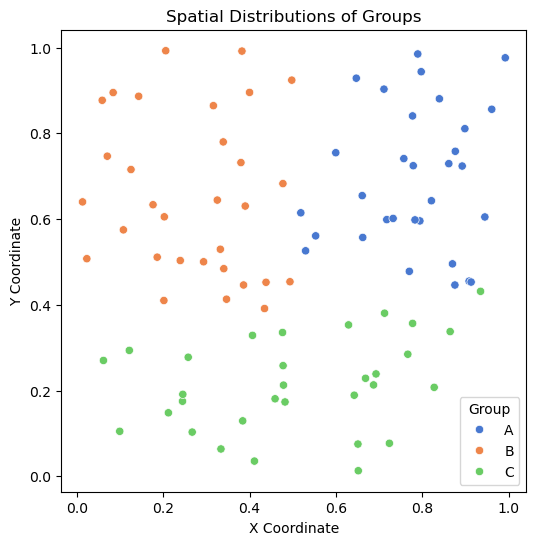

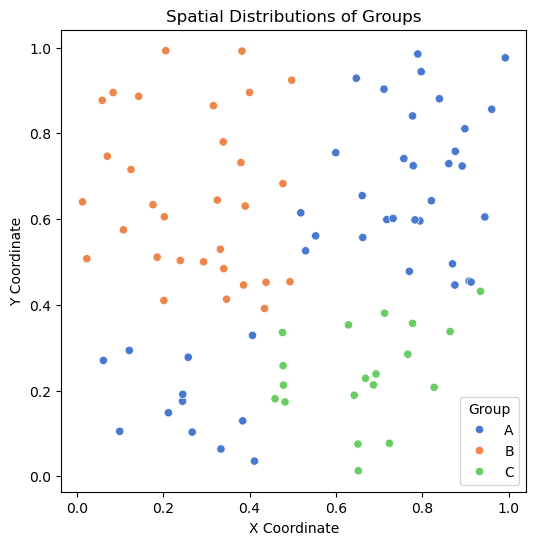

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [59]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 0.00 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923224,
 'Silhouette Coefficient': 0.2376376035724321,
 'FMI': 0.79646086722093,
 'SGD': 0.1784377189080948}

## Case 4 : Gene Similarity

### Case 4.1:不同类的分到同一类

#### 相似

In [89]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/sim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/sim_pred_SpatialData.csv"

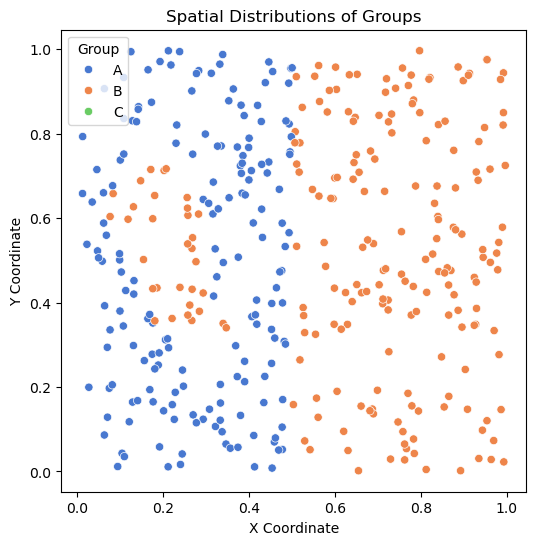

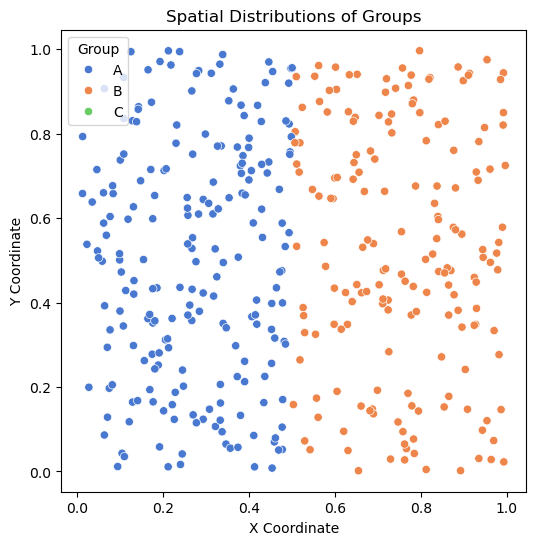

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [90]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 0.01 seconds.


PicklingError: Can't pickle <function gaussian_emd at 0x000001B3832765C0>: it's not the same object as SGD_calculator.gaussian_emd

#### 不相似

In [95]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/dissim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/dissim_pred_SpatialData.csv"

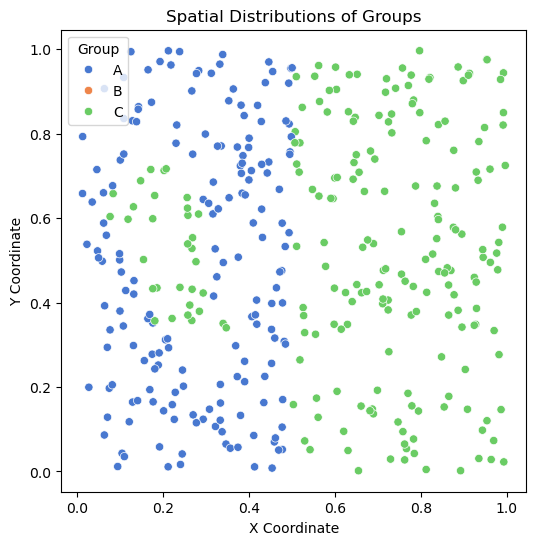

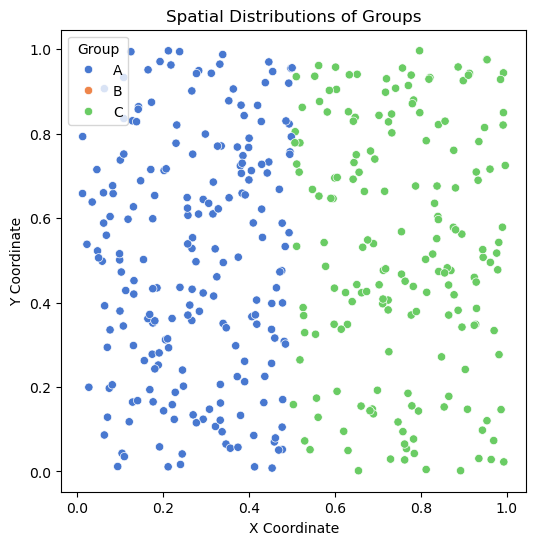

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [97]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 0.01 seconds.
Unexpected exception formatting exception. Falling back to standard exception


concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\11146\.conda\envs\Pytorch\Lib\multiprocessing\queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\11146\.conda\envs\Pytorch\Lib\multiprocessing\reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
_pickle.PicklingError: Can't pickle <function gaussian_emd at 0x000001B3832765C0>: it's not the same object as SGD_calculator.gaussian_emd
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\11146\.conda\envs\Pytorch\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\11146\AppData\Local\Temp\ipykernel_9212\2063885319.py", line 1, in <module>
    evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_

### Case4.2:不同类分到同一类

#### 相似 B C

In [ ]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/sim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/sim_truth_SpatialData.csv"

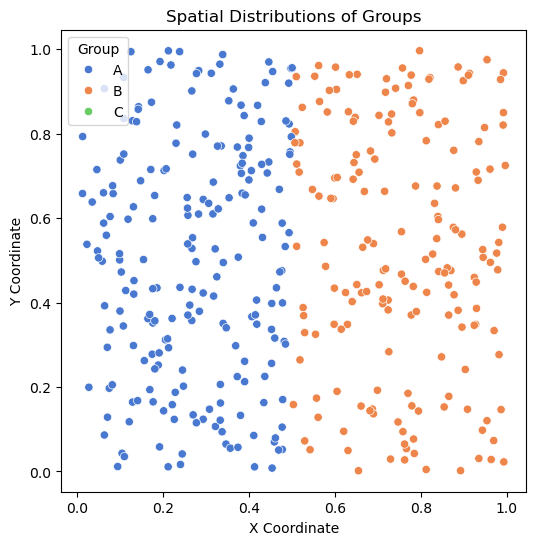

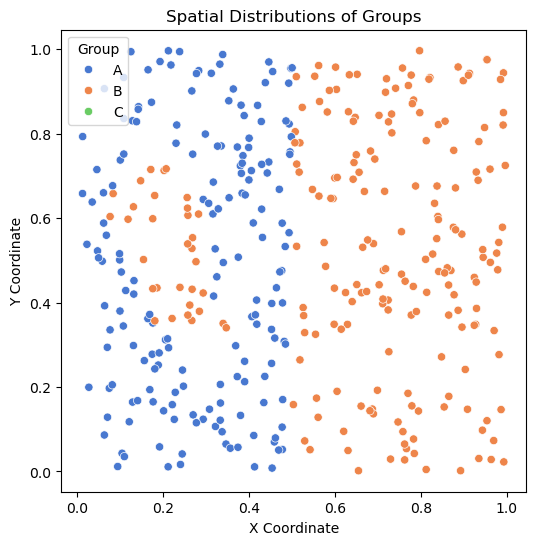

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 0.02 seconds.
Entire loop took 12.71863 seconds.
Average kernel execution time: 0.12719 seconds.
Entire loop took 13.36265 seconds.
Average kernel execution time: 0.13363 seconds.
Entire loop took 13.76612 seconds.
Average kernel execution time: 0.13766 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.22005656751425898,
 'FMI': 0.8485536034131528,
 'SGD': 0.07485438969216318}

#### 不相似

In [ ]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/dissim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/dissim_truth_SpatialData.csv"

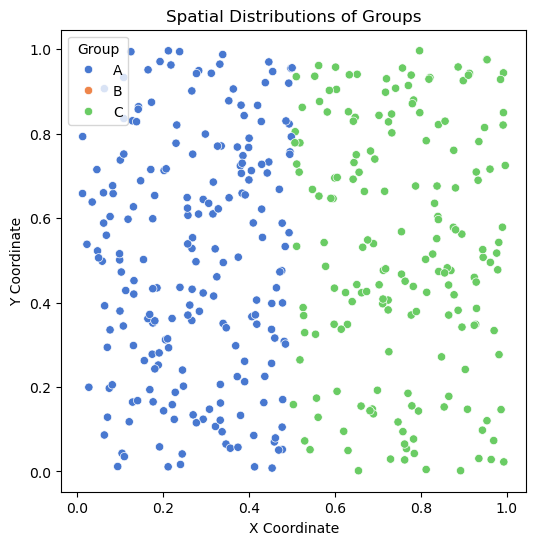

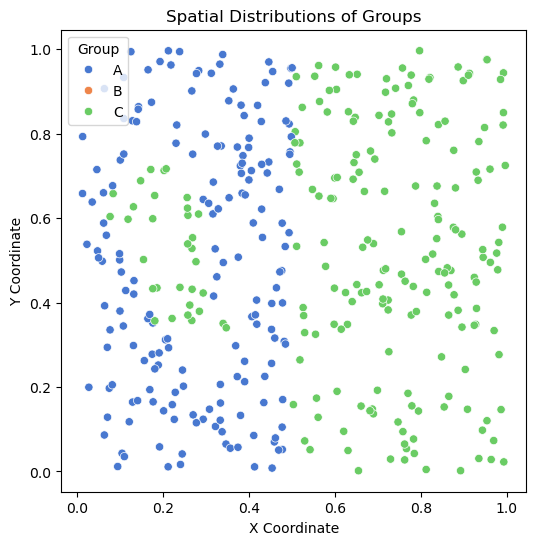

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 0.02 seconds.


KeyboardInterrupt: 

### 集中

In [54]:
coordinate_file_truth = "data/simulate/Case6/Case6.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6/Case6.1/center_SpatialData.csv"

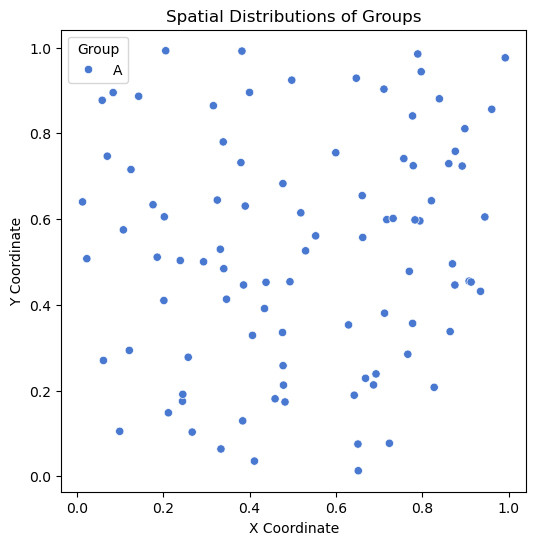

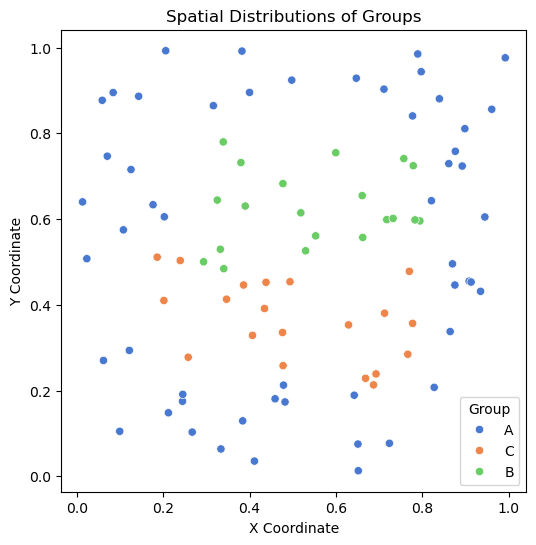

In [55]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [56]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.63662 seconds.
Average kernel execution time: 0.00637 seconds.
Entire loop took 0.39401 seconds.
Average kernel execution time: 0.00394 seconds.
Entire loop took 0.64385 seconds.
Average kernel execution time: 0.00644 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': -0.06526838772456982,
 'FMI': 0.6410457795232727,
 'SGD': 1.8177264212633957}

### 分散

In [57]:
coordinate_file_truth = "data/simulate/Case6/Case6.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6/Case6.1/split_SpatialData.csv"

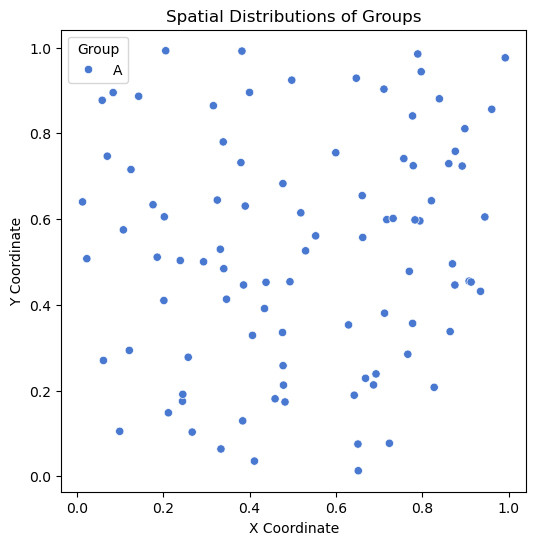

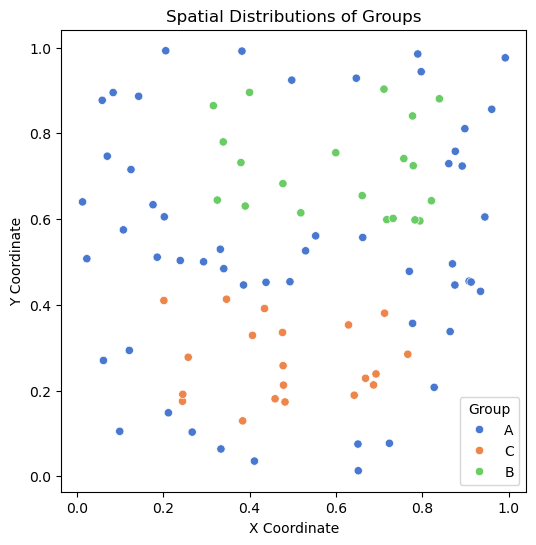

In [58]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [59]:
evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.56317 seconds.
Average kernel execution time: 0.00563 seconds.
Entire loop took 0.36584 seconds.
Average kernel execution time: 0.00366 seconds.
Entire loop took 0.58395 seconds.
Average kernel execution time: 0.00584 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': 0.020466204557013992,
 'FMI': 0.6410457795232727,
 'SGD': 1.7088075571203507}